In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,scale , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error , r2_score , accuracy_score , confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [11]:
df = pd.read_csv("./reading_data/diabetes.csv")

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
X_train,X_test,y_train,y_test = train_test_split(df.drop("Outcome",axis=1),df["Outcome"],test_size=0.2)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## LogisticRegression

In [91]:
model = LogisticRegression(max_iter = 1000).fit(X_train,y_train)
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[96, 16],
       [14, 28]], dtype=int64)

In [92]:
accuracy_score(y_test,y_pred)

0.8051948051948052

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       112
           1       0.64      0.67      0.65        42

    accuracy                           0.81       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.81      0.81      0.81       154



In [94]:
model.predict_proba(X_test)[0:10]

array([[0.95123053, 0.04876947],
       [0.9144769 , 0.0855231 ],
       [0.98696164, 0.01303836],
       [0.17848388, 0.82151612],
       [0.97643478, 0.02356522],
       [0.23944915, 0.76055085],
       [0.55802252, 0.44197748],
       [0.4327355 , 0.5672645 ],
       [0.92702062, 0.07297938],
       [0.87573844, 0.12426156]])

In [96]:
cross_val_score(model,X_test,y_test,cv=10).mean()

0.7725

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## K-NeighborsClassification

In [121]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7467532467532467

In [108]:
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [103]:
probability= pd.DataFrame(knn_model.predict_proba(X_test),columns=["Probability of 0","Probability of 1"])

In [104]:
probability

,Probability of 0,Probability of 1
0,0.8,0.2
1,0.8,0.2
2,0.8,0.2
3,0.0,1.0
4,1.0,0.0
...,...,...
149,0.4,0.6
150,0.0,1.0
151,1.0,0.0
152,0.4,0.6


In [113]:
knn_params = {"n_neighbors":np.arange(1,50),"leaf_size":[20,30,40]}
knn_cv = GridSearchCV(knn_model,knn_params,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:    9.3s finished


In [114]:
knn_cv.best_params_

{'leaf_size': 20, 'n_neighbors': 12}

In [126]:
knn_cv.best_score_

0.7459016393442622

In [129]:
knn_model = KNeighborsClassifier(leaf_size=20,n_neighbors=12).fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7012987012987013

## SupportVectorMachine

In [144]:
svm_model =SVC(kernel="linear").fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7337662337662337

In [131]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [159]:
svm_params = {"C":np.arange(1,10),"kernel":["linear","rbf"]}

In [160]:
svm_cv = GridSearchCV(SVC(),svm_params,cv=10,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 20.0min finished


In [162]:
svm_cv.best_params_

{'C': 8, 'kernel': 'linear'}

In [163]:
svm_cv.best_score_

0.7864886303543098

In [164]:
svm_model =SVC(C=8,kernel="linear").fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7207792207792207

## Neural Networks Classifier(MLPClassifier)

In [6]:
nn_model = MLPClassifier().fit(X_train,y_train)
y_pred = nn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6428571428571429

In [7]:
confusion_matrix(y_test,y_pred)

array([[70, 31],
       [24, 29]], dtype=int64)

In [8]:
nn_model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [14]:
nn_params = {"alpha":[0.0001,0.001,0.01],"hidden_layer_sizes":[(10,10),(20,20),(10,20)],"max_iter":[200,300,400]}
nn_cv = GridSearchCV(MLPClassifier(),nn_params,cv=10,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.0min finished


In [16]:
nn_cv.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'max_iter': 400}

In [22]:
nn_cv.best_score_

0.7165520888418826

In [33]:
nn_model = MLPClassifier(activation="logistic",alpha=0.0001,hidden_layer_sizes=(10,10),max_iter=400).fit(X_train,y_train)
y_pred = nn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7012987012987013

In [34]:
?nn_cv

Type:        GridSearchCV
String form:
GridSearchCV(cv=10, error_score=nan,
           estimator=MLPClassifier(activation='relu', alph <...> _dispatch='2*n_jobs', refit=True, return_train_score=False,
           scoring=None, verbose=2)
File:        c:\users\darak\anaconda3\lib\site-packages\sklearn\model_selection\_search.py
Docstring:  
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "predict", "predict_proba", "decision_function",
"transform" and "inverse_transform" if they are implemented in the
estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object.
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``sc

## CART

In [6]:
cart = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = cart.predict(X_test)
accuracy_score(y_test,y_pred)

0.6948051948051948

In [7]:
#Model Tuning is same

## Random Forests

In [9]:
rf = RandomForestClassifier()

In [10]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
rf_params = {"n_estimators":[100,200,400],"min_samples_split":[2,4,8,16]}
rf_cv = GridSearchCV(rf,rf_params,cv=10,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   43.4s finished


In [17]:
rf_cv.best_score_

0.7785034373347435

In [18]:
rf_cv.best_params_

{'min_samples_split': 16, 'n_estimators': 400}

In [19]:
rf = RandomForestClassifier(min_samples_split=16,n_estimators=400).fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7272727272727273

In [38]:
importances =pd.DataFrame({"importances":rf.feature_importances_},index=X_train.columns).sort_values(by="importances",ascending=False)

In [40]:
importances

,importances
Glucose,0.311502
BMI,0.182018
Age,0.133014
DiabetesPedigreeFunction,0.113914
Pregnancies,0.072851
BloodPressure,0.065008
Insulin,0.064302
SkinThickness,0.057392


In [44]:
#Barplot takes series or arrays as an input

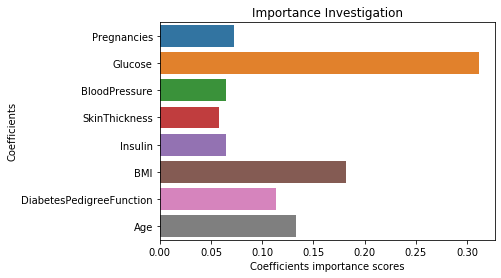

In [51]:
sns.barplot(x=rf.feature_importances_,y=X_train.columns)
plt.xlabel("Coefficients importance scores")
plt.ylabel("Coefficients")
plt.title("Importance Investigation")
plt.show()

## GradientBoostingClassifier